<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/Proceso_general_-aprendizaje_supervisado/blob/main/proceso_completo_machine_learning_con_nuevo_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 4 – Proceso general para aplicar aprendizaje supervisado de principio a fin
**Objetivo:** importar, limpiar, escalar, entrenar 5 algoritmos y comparar resultados.


In [ ]:
# Dependencias base
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# # Opcional (bonus)
# !pip -q install xgboost
# from xgboost import XGBClassifier

################################################NUEVA EJECUCION

# --- 1. Dependencias Fundamentales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Carga de Datos (desde sklearn) ---
from sklearn.datasets import fetch_openml

# --- 3. Preprocesamiento y Pipeline ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Útil si hay nulos

# --- 4. Modelos a Entrenar ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- 5. Métricas de Evaluación ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Configuración de visualización
%matplotlib inline
sns.set_theme(style="whitegrid")

## 1) Importación de datos
- Carga desde CSV (o desde sklearn como alternativa).
- Revisa forma (filas/columnas) y tipos de datos.
- Quita columnas no predictivas (ej. ID).


In [ ]:
# Cargar el dataset 'credit-g' (German Credit) desde OpenML
# as_frame=True lo carga directamente como un DataFrame de pandas
print("Cargando dataset 'German Credit Risk' desde OpenML...")
credit_data = fetch_openml('credit-g', version=1, as_frame=True, parser='auto')

# El target (y) y las features (X) ya vienen separados
X = credit_data.data
y = credit_data.target

# Para el EDA, es más fácil tenerlos juntos en un solo DataFrame
df = X.copy()
df['credit_risk'] = y # Añadimos el target al DataFrame

print("Carga completada.")

df


Cargando dataset 'German Credit Risk' desde OpenML...
Carga completada.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_risk
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


## 2) Exploratory Data Analysis (EDA) mínimo
- Distribucion en el balance de clases
- Detección básica de nulos/duplicados
- Descriptivos rápidos



Total de valores nulos en el DataFrame: 0
Total de filas duplicadas: 0
Balance de clases (Conteo):
credit_risk
good    700
bad     300
Name: count, dtype: int64

Balance de clases (Porcentaje):
credit_risk
good    70.0
bad     30.0
Name: proportion, dtype: float64


/tmp/ipython-input-2766759794.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='pastel')


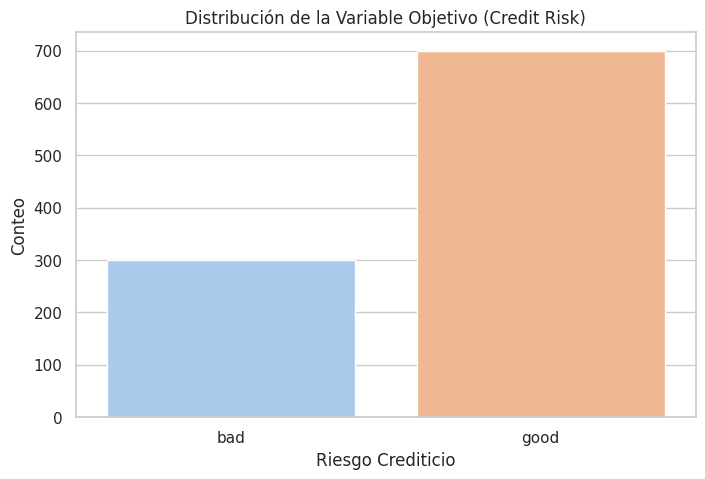

--- Descriptivos (Numéricos) ---
                         count      mean          std    min     25%     50%  \
duration                1000.0    20.903    12.058814    4.0    12.0    18.0   
credit_amount           1000.0  3271.258  2822.736876  250.0  1365.5  2319.5   
installment_commitment  1000.0     2.973     1.118715    1.0     2.0     3.0   
residence_since         1000.0     2.845     1.103718    1.0     2.0     3.0   
age                     1000.0    35.546    11.375469   19.0    27.0    33.0   
existing_credits        1000.0     1.407     0.577654    1.0     1.0     1.0   
num_dependents          1000.0     1.155     0.362086    1.0     1.0     1.0   

                            75%      max  
duration                  24.00     72.0  
credit_amount           3972.25  18424.0  
installment_commitment     4.00      4.0  
residence_since            4.00      4.0  
age                       42.00     75.0  
existing_credits           2.00      4.0  
num_dependents           

In [ ]:
# 1. Detección básica de nulos
# Ya vimos con .info() que no había, pero esta es la forma de comprobarlo sumando
print(f"Total de valores nulos en el DataFrame: {df.isna().sum().sum()}")

# 2. Detección de duplicados
print(f"Total de filas duplicadas: {df.duplicated().sum()}")


##########Distribución y Balance de Clases (Target)

# Variable objetivo: 'credit_risk'
target_col = 'credit_risk'

# 1. Conteo de clases
print("Balance de clases (Conteo):")
print(df[target_col].value_counts())

print("\nBalance de clases (Porcentaje):")
print(df[target_col].value_counts(normalize=True) * 100)

# 2. Visualización del balance
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=target_col, palette='pastel')
plt.title('Distribución de la Variable Objetivo (Credit Risk)')
plt.xlabel('Riesgo Crediticio')
plt.ylabel('Conteo')
plt.show();

#########Descriptivos Rápidos
# 1. Descriptivos para variables NUMÉRICAS
print("--- Descriptivos (Numéricos) ---")
# .T transpone la salida para que sea más fácil de leer
print(df.describe(include=[np.number]).T)


# 2. Descriptivos para variables CATEGÓRICAS
print("\n--- Descriptivos (Categóricos) ---")
# 'unique' es el número de categorías únicas
# 'top' es la categoría más frecuente
# 'freq' es la frecuencia de la categoría 'top'
print(df.describe(include=['category']).T)




## 3) Limpieza
- Eliminar/ignorar `ID`.
- Imputación simple si hubiera nulos (mediana).
- Definir X (features) e y (etiqueta).

In [ ]:
##################Codificacion deL TARGET (y)
# 1. Codificar el Target (y)
# Aplicando la lógica de tu molde para normalizar la etiqueta
print("Etiquetas originales:", y.unique())

y_numeric = y.map({'good': 0, 'bad': 1}).astype(int)

print("Etiquetas codificadas:", y_numeric.unique())
print("Balance de clases (0=good, 1=bad):\n", y_numeric.value_counts())



#################Definición del Pipeline de Preprocesamiento

# 1. Identificar columnas por tipo
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['category']).columns

print(f"Columnas numéricas ({len(numeric_features)}): {list(numeric_features)}")
print(f"Columnas categóricas ({len(categorical_features)}): {list(categorical_features)}")

# 2. Crear el pipeline para features NUMÉRICAS
# (Tu molde pide imputar con mediana. Lo incluimos en el pipeline)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Lógica de tu molde
    ('scaler', StandardScaler()) # Escalado
])

# 3. Crear el pipeline para features CATEGÓRICAS
# (Imputamos con la más frecuente y luego codificamos)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Ignora categorías raras en test
])

# 4. Combinar ambos pipelines en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Deja pasar cualquier columna no especificada (aunque no debería haber)
)

print("\nPipeline de preprocesamiento CREADO.")


#######División de Datos (Split)
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric,
    test_size=0.2,
    random_state=42, # Para reproducibilidad
    stratify=y_numeric # ¡¡CRÍTICO por el desbalance!!
)

print("\n--- Formas de los datos divididos ---")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

print("\nVerificación de estratificación (Train):")
print(y_train.value_counts(normalize=True))
print("\nVerificación de estratificación (Test):")
print(y_test.value_counts(normalize=True))


Etiquetas originales: ['good', 'bad']
Categories (2, object): ['bad', 'good']
Etiquetas codificadas: [0 1]
Balance de clases (0=good, 1=bad):
 class
0    700
1    300
Name: count, dtype: int64
Columnas numéricas (7): ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
Columnas categóricas (13): ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

Pipeline de preprocesamiento CREADO.

--- Formas de los datos divididos ---
X_train: (800, 20)
X_test: (200, 20)
y_train: (800,)
y_test: (200,)

Verificación de estratificación (Train):
class
0    0.7
1    0.3
Name: proportion, dtype: float64

Verificación de estratificación (Test):
class
0    0.7
1    0.3
Name: proportion, dtype: float64


## 4) Split y normalización
- `train_test_split` estratificado.


In [ ]:
###Split y Normalización
# Re-confirmamos las variables del paso anterior
# X = df.drop(columns=['credit_risk'])
# y_numeric = df['credit_risk'].map({'good': 0, 'bad': 1}).astype(int)

# Aplicando tu plantilla para el split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric,
    test_size=0.3,       # Usando tu plantilla (30% test)
    random_state=42,     # Para reproducibilidad
    stratify=y_numeric   # CRÍTICO por el desbalance
)

# --- Verificación ---
print("--- Formas de los datos divididos ---")
print(f"X_train (features): {X_train.shape}")
print(f"y_train (target):   {y_train.shape}")
print(f"X_test (features):  {X_test.shape}")
print(f"y_test (target):    {y_test.shape}")

print("\n--- Verificación de Estratificación (Train 70%) ---")
print(y_train.value_counts(normalize=True))

print("\n--- Verificación de Estratificación (Test 30%) ---")
print(y_test.value_counts(normalize=True))


##################Normalización (Manejada por el Pipeline)
#No aplicamos la normalización (ej. StandardScaler) directamente a X_train ahora. Para evitar fuga de datos (data leakage), esta transformación está encapsulada dentro del preprocessor que definimos en el paso anterior.

#Este preprocessor se ajustará (.fit()) solo con los datos de X_train y luego se usará para transformar (.transform()) tanto X_train como X_test en el siguiente paso, cuando construyamos los pipelines de los modelos.




--- Formas de los datos divididos ---
X_train (features): (700, 20)
y_train (target):   (700,)
X_test (features):  (300, 20)
y_test (target):    (300,)

--- Verificación de Estratificación (Train 70%) ---
class
0    0.7
1    0.3
Name: proportion, dtype: float64

--- Verificación de Estratificación (Test 30%) ---
class
0    0.7
1    0.3
Name: proportion, dtype: float64


## 4.1) Escalado de características (StandardScaler)

El **escalado** transforma las variables numéricas para que todas estén en la **misma escala**.  
En este caso, con `StandardScaler`, cada variable se convierte a:

- **Media = 0**
- **Desviación estándar = 1**

¿Por qué es importante?  
- Algoritmos como **Regresión Logística, KNN o SVM** son muy sensibles a las diferencias de escala.  
- Sin escalado, una variable con valores grandes (ej. `area_mean`) dominaría sobre otra pequeña (ej. `smoothness_mean`).  

Con el escalado, todas las variables tienen el **mismo peso relativo**.


Columnas numéricas a escalar (para demo): ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


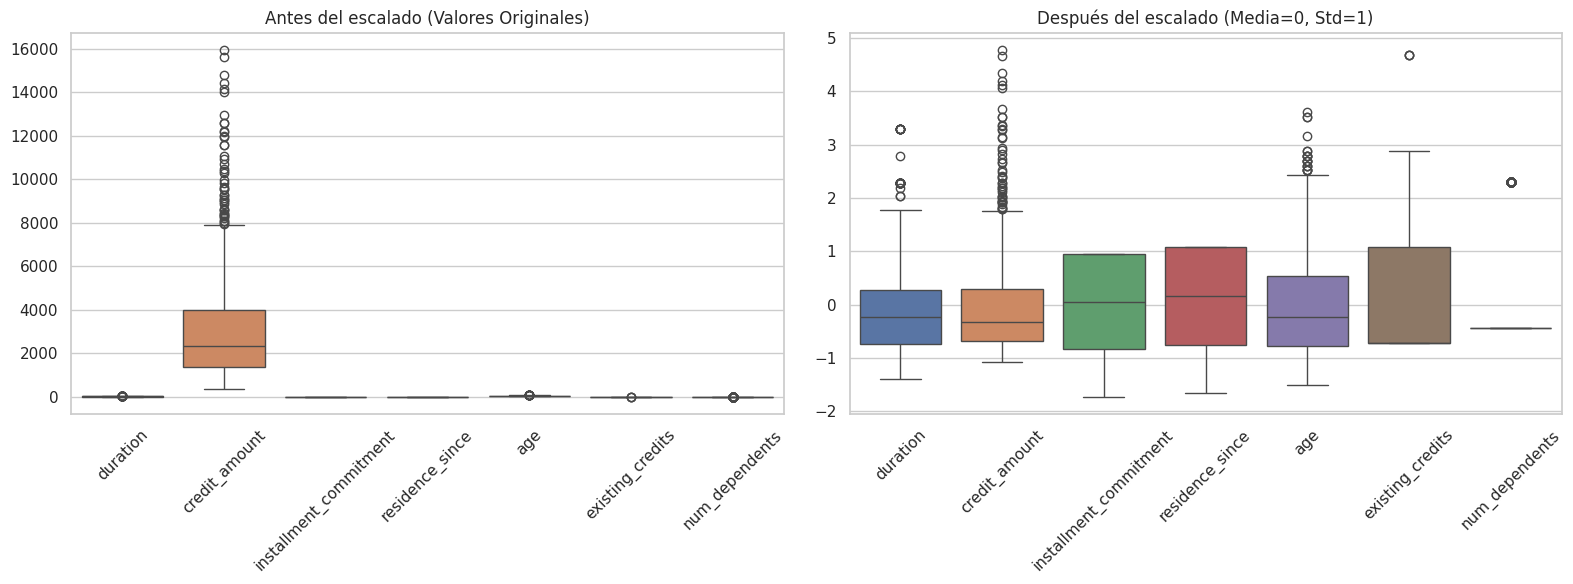

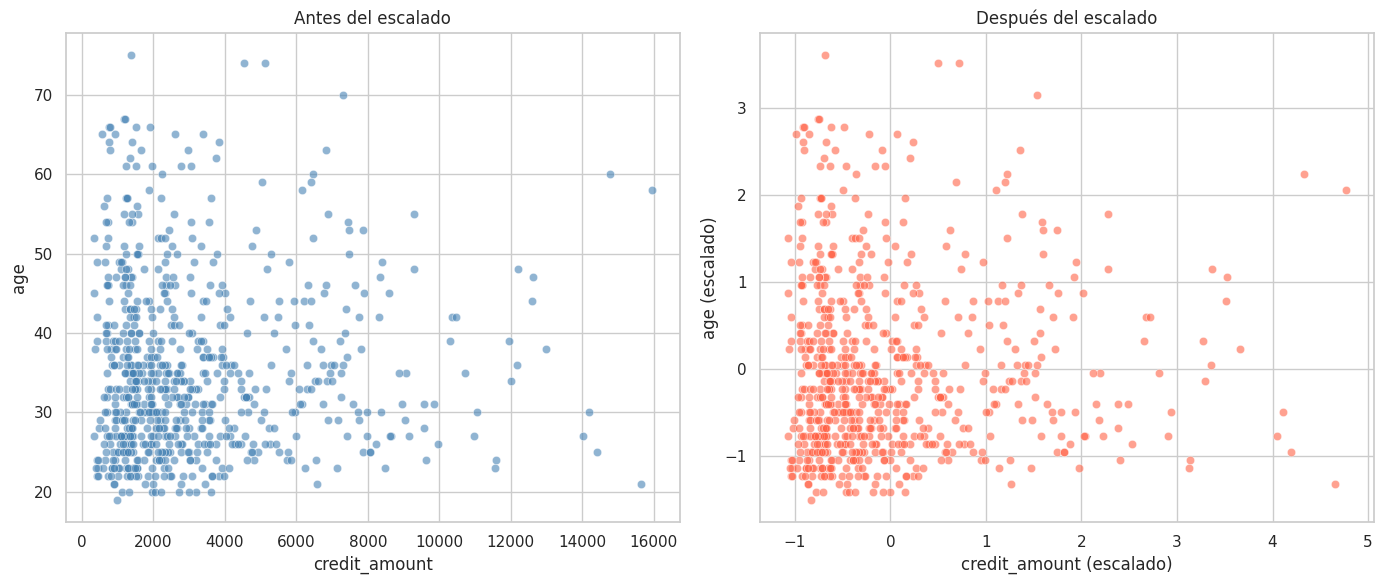

In [ ]:
####4.1) Visualización del Escalado de Características (StandardScaler)
# 1. Identificar las columnas numéricas que definimos antes
numeric_features = X_train.select_dtypes(include=[np.number]).columns
print(f"Columnas numéricas a escalar (para demo): {list(numeric_features)}")

# 2. Aplicar el escalado (como en tu plantilla) PERO solo a las features numéricas
scaler = StandardScaler().fit(X_train[numeric_features])
X_train_sc = scaler.transform(X_train[numeric_features])

# 3. Convertimos a DataFrame para graficar
X_train_sc_df = pd.DataFrame(X_train_sc, columns=numeric_features, index=X_train.index)

##Boxplot Antes y Después
# 1) Boxplot antes y después (todas nuestras variables numéricas)
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train[numeric_features])
plt.title("Antes del escalado (Valores Originales)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sc_df[numeric_features])
plt.title("Después del escalado (Media=0, Std=1)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

########Scatter Antes y Después
# 2) Scatter de dos variables antes y después del escalado
plt.figure(figsize=(14, 6))
var1 = "credit_amount"
var2 = "age"

plt.subplot(1, 2, 1)
sns.scatterplot(data=X_train, x=var1, y=var2, alpha=0.6, color="steelblue")
plt.title("Antes del escalado")
plt.xlabel(var1)
plt.ylabel(var2)

plt.subplot(1, 2, 2)
sns.scatterplot(data=X_train_sc_df, x=var1, y=var2, alpha=0.6, color="tomato")
plt.title("Después del escalado")
plt.xlabel(f"{var1} (escalado)")
plt.ylabel(f"{var2} (escalado)")

plt.tight_layout()
plt.show()



## 5) Modelos y pipelines
- Crear pipeline por modelo para asegurar preprocesamiento consistente.


In [ ]:
####Definición de Modelos
# 1. Definir los 5 modelos (usando tu plantilla con class_weight)
models_to_run = {
    "Regresión Logística": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42, class_weight="balanced"), # Añadido class_weight
    "Random Forest (300)": RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced") # Añadido class_weight
}

# 'preprocessor' ya fue definido en el paso 4
# 'X_train', 'y_train', 'X_test', 'y_test' ya están definidos

#############Entrenamiento y Evaluación en Bucle
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Listas para guardar los resultados
results_list = []
trained_pipelines = {} # Diccionario para guardar los pipelines ya entrenados

print("--- Iniciando Entrenamiento de 5 Modelos ---")

for name, model in models_to_run.items():

    # 1. Crear el Pipeline completo: Preprocesador -> Modelo
    # Esto une los pasos de escalado/codificación con el clasificador
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # 2. Entrenar el pipeline en los datos RAW de train
    print(f"Entrenando {name}...")
    full_pipeline.fit(X_train, y_train)

    # 3. Predecir en los datos RAW de test
    y_pred = full_pipeline.predict(X_test)

    # 4. Calcular métricas (usando la lógica de tu plantilla para ROC-AUC)
    # Nota: Nos enfocamos en la clase 1 ('bad' = riesgo)
    try:
        y_score = full_pipeline.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_score)
    except Exception:
        auc = np.nan # Para modelos sin predict_proba (aunque SVC lo tiene)

    # 5. Guardar resultados
    # Añadimos pos_label=1 para enfocarnos en la clase minoritaria ('bad')
    results_list.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (clase 1)": precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        "Recall (clase 1)": recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        "F1-Score (clase 1)": f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        "ROC-AUC": auc
    })

    # 6. Guardar el pipeline entrenado para uso futuro
    trained_pipelines[name] = full_pipeline

print("\n--- Entrenamiento Completado ---")

# Convertir a DataFrame para una visualización clara
results_df = pd.DataFrame(results_list).set_index("Modelo")
results_df = results_df.sort_values(by="F1-Score (clase 1)", ascending=False)

# Mostrar la tabla de métricas
print("Tabla de Métricas de Evaluación (Clase 1 = 'bad risk')")
display(results_df.style.format('{:.4f}').background_gradient(cmap='viridis'))



--- Iniciando Entrenamiento de 5 Modelos ---
Entrenando Regresión Logística...
Entrenando KNN (k=7)...
Entrenando SVM (RBF)...
Entrenando Árbol de Decisión...
Entrenando Random Forest (300)...

--- Entrenamiento Completado ---
Tabla de Métricas de Evaluación (Clase 1 = 'bad risk')


,Accuracy,Precision (clase 1),Recall (clase 1),F1-Score (clase 1),ROC-AUC
Modelo,,,,,
Regresión Logística,0.7300,0.5349,0.7667,0.6301,0.8037
SVM (RBF),0.7233,0.5280,0.7333,0.6140,0.8033
Random Forest (300),0.7533,0.6667,0.3556,0.4638,0.7953
Árbol de Decisión,0.6633,0.4421,0.4667,0.4541,0.6071
KNN (k=7),0.7500,0.6596,0.3444,0.4526,0.7424


## 6) Validación y comparación
- Métricas: Accuracy, Precision, Recall, F1, ROC-AUC (macro si multiclase).


Tabla de Métricas de Evaluación (Ordenada por F1-Score para 'bad risk')


,Accuracy,Precision (clase 1),Recall (clase 1),F1-Score (clase 1),ROC-AUC
Modelo,,,,,
Regresión Logística,0.7300,0.5349,0.7667,0.6301,0.8037
SVM (RBF),0.7233,0.5280,0.7333,0.6140,0.8033
Random Forest (300),0.7533,0.6667,0.3556,0.4638,0.7953
Árbol de Decisión,0.6633,0.4421,0.4667,0.4541,0.6071
KNN (k=7),0.7500,0.6596,0.3444,0.4526,0.7424


--- Mejor Modelo por F1-Score (clase 1): Regresión Logística ---

--- Reporte de Clasificación ---
               precision    recall  f1-score   support

Good Risk (0)       0.88      0.71      0.79       210
 Bad Risk (1)       0.53      0.77      0.63        90

     accuracy                           0.73       300
    macro avg       0.71      0.74      0.71       300
 weighted avg       0.77      0.73      0.74       300


--- Matriz de Confusión ---


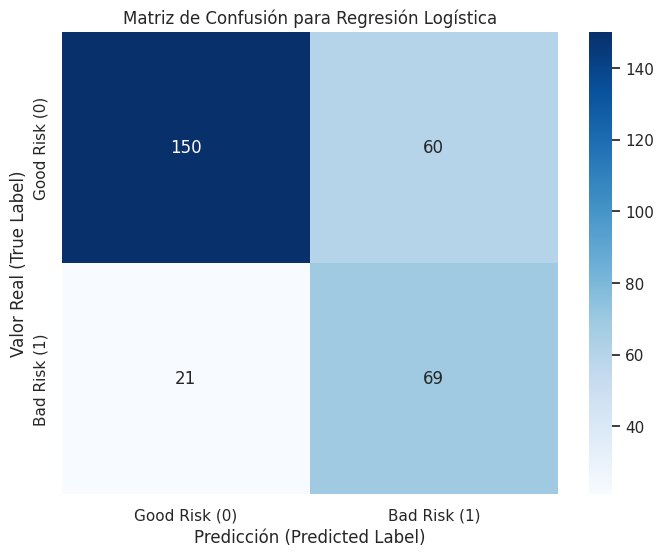

In [ ]:
#####Tabla Comparativa de Métricas
# 'results_df' ya fue creado, ordenado y mostrado en el paso 5.
# Lo mostramos de nuevo para seguir la secuencia de la tarea.
print("Tabla de Métricas de Evaluación (Ordenada por F1-Score para 'bad risk')")
display(results_df.style.format('{:.4f}').background_gradient(cmap='viridis'))


######Análisis del Mejor Modelo y Matriz de Confusión
# 1. Identificar el mejor modelo por F1-Score (clase 1)
best_model_name = results_df['F1-Score (clase 1)'].idxmax()
print(f"--- Mejor Modelo por F1-Score (clase 1): {best_model_name} ---")

# 2. Obtener las predicciones del mejor modelo
# (Recuperamos el pipeline entrenado y predecimos en X_test)
best_pipeline = trained_pipelines[best_model_name]
y_pred_best = best_pipeline.predict(X_test)

# 3. Mostrar el Classification Report
# (Usamos nuestros nombres de clase personalizados)
target_names = ["Good Risk (0)", "Bad Risk (1)"]
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred_best, target_names=target_names))

# 4. Mostrar la Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred_best)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Matriz de Confusión para {best_model_name}')
plt.ylabel('Valor Real (True Label)')
plt.xlabel('Predicción (Predicted Label)')
plt.show();


## 📊 Comparación de modelos: ¿por qué unos funcionan mejor que otros?

1. **SVM (RBF)**
   - Encuentra **fronteras de decisión no lineales** gracias al kernel RBF.
   - Maximiza el **margen entre clases**, lo que lo hace más robusto.
   - Se beneficia mucho del **escalado de variables**.
   - Resultado: el mejor desempeño global (F1 ≈ 0.98).

2. **Regresión Logística**
   - Supone una **frontera lineal**, pero funciona muy bien porque el dataset es relativamente limpio.
   - Es rápida, interpretable y ofrece probabilidades.
   - Le va excelente después del escalado, aunque no captura relaciones complejas como SVM.

3. **Random Forest**
   - Combina muchos árboles → generaliza mejor que un solo árbol.
   - Tolera ruido y evita sobreajuste, pero puede perder recall en algunos casos.
   - Muy bueno en datasets tabulares, aunque menos suave en sus fronteras.

4. **KNN**
   - Clasifica por cercanía a los vecinos.
   - Depende mucho de la **escala** y del número de vecinos elegido.
   - Funciona bien, pero en fronteras difíciles puede confundirse (recall más bajo).

5. **Árbol de Decisión**
   - Fácil de interpretar, pero tiende a **sobreajustar** con datos pequeños.
   - Sus cortes son “rectangulares”, lo que limita la flexibilidad.
   - Peor desempeño comparado con los demás, aunque útil como punto de partida.

---

### 🧾 Conclusión
- **SVM RBF** se adapta mejor porque ofrece una frontera flexible y robusta.  
- **Modelos lineales (LogReg)** funcionan bien en datasets limpios y balanceados.  
- **Ensamblados (RF)** son estables pero menos precisos aquí.  
- **Modelos simples (Árbol, KNN)** ayudan a entender conceptos, pero no siempre alcanzan la mejor precisión.  



Forma original de X: (1000, 20)
Forma de X preprocesado (escalado + one-hot): (1000, 61)
Forma final de X-PCA (2D): (1000, 2)
Graficando frontera para Regresión Logística...
Graficando frontera para KNN (k=7)...
Graficando frontera para SVM (RBF)...
Graficando frontera para Árbol de Decisión...
Graficando frontera para Random Forest (300)...


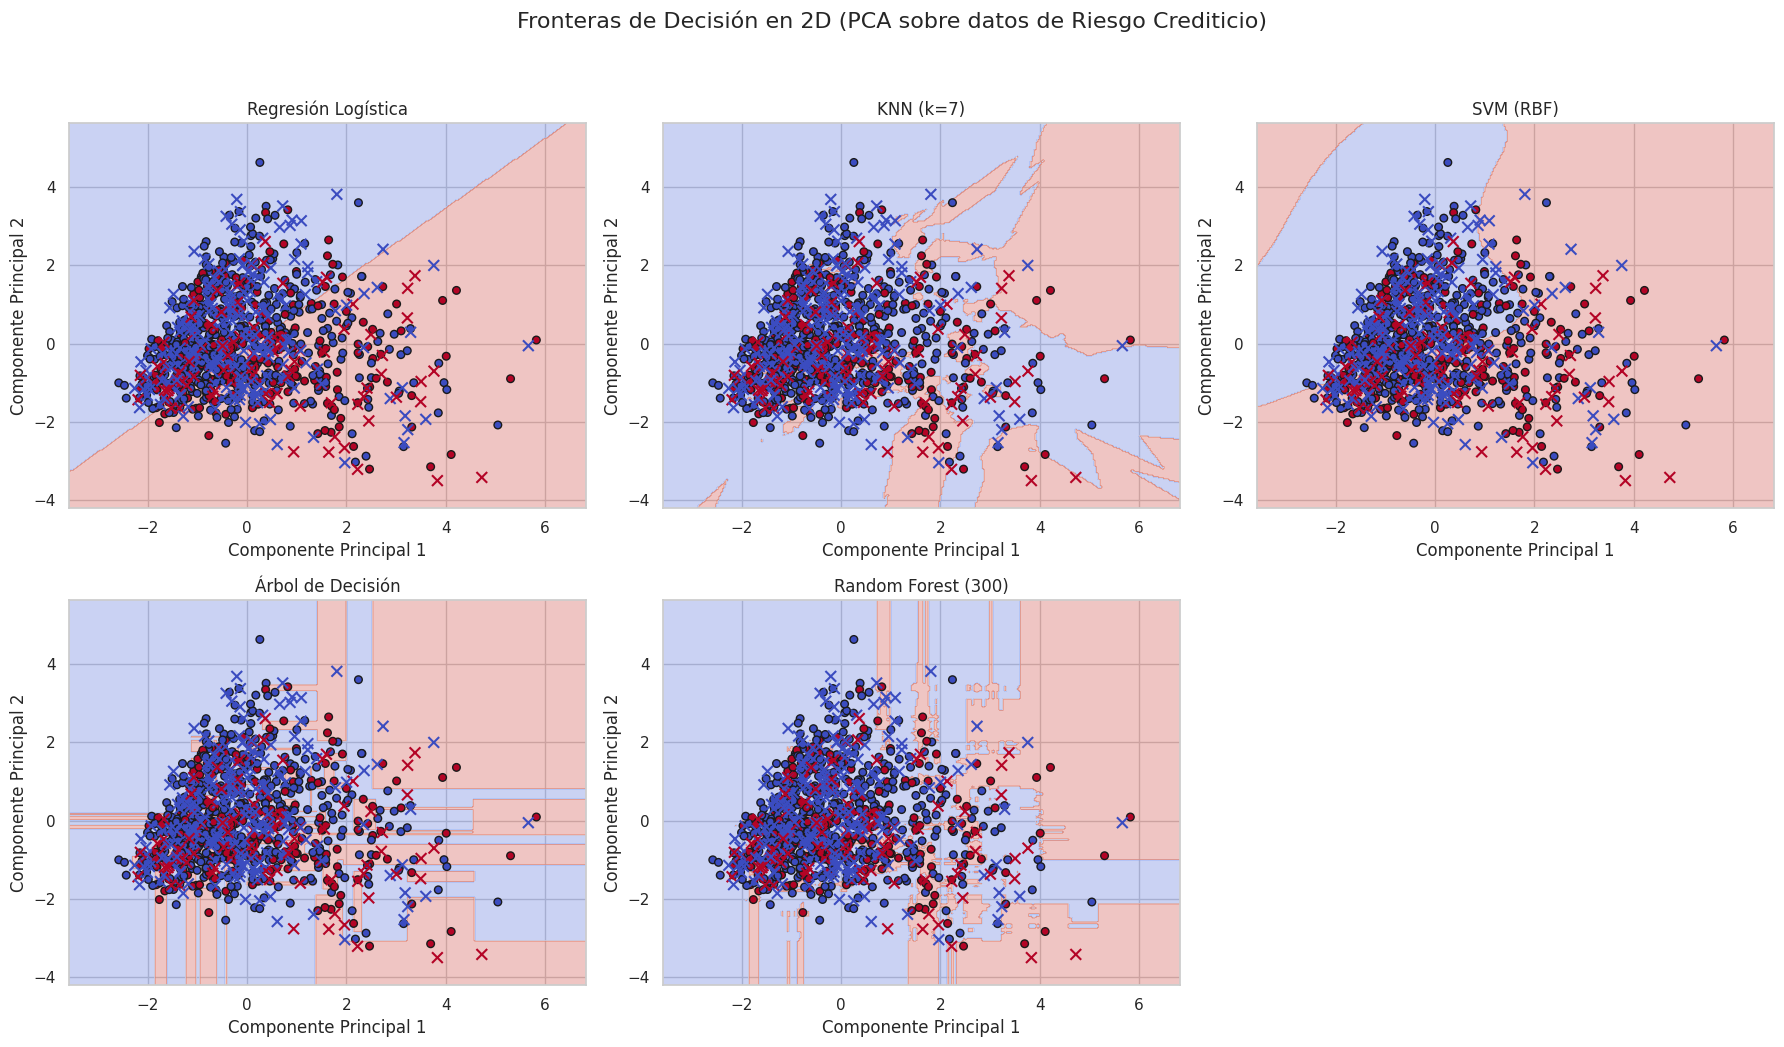

In [ ]:
###########Visualización de Fronteras de Decisión con PCA
#########Preparación: Preprocesamiento Completo + PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# --- PASO 1: Procesar X a 100% numérico ---
# Usamos el 'preprocessor' que ya definimos (con StandardScaler y OneHotEncoder)
# Lo ajustamos y transformamos en TODO X.

print("Forma original de X:", X.shape)

# LÍNEA CORREGIDA: Eliminamos .toarray()
X_processed = preprocessor.fit_transform(X)

print("Forma de X preprocesado (escalado + one-hot):", X_processed.shape)

# --- PASO 2: Aplicar PCA a la matriz procesada ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)
print("Forma final de X-PCA (2D):", X_pca.shape)

# --- PASO 3: Dividir los datos 2D (usando y_numeric) ---
# Usamos y_numeric (0/1) que definimos en el paso 4
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_numeric,
    test_size=0.3,       # Mismo split 30% que antes
    random_state=42,
    stratify=y_numeric   # Mantenemos la estratificación
)

####Gráficos de Fronteras de Decisión (Adaptado de tu código)
# Re-definimos los modelos (usando las versiones balanceadas)
models_2d = {
    "Regresión Logística": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest (300)": RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"),
}

# --- Tu código de visualización ---
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
axes = axes.ravel() # Aplana la grilla de 2x3 para iterar

# Crear malla para la frontera
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                       np.linspace(y_min, y_max, 300))

# Colores (0=Good=Azul, 1=Bad=Rojo)
cmap_plot = "coolwarm"

for i, (name, clf) in enumerate(models_2d.items()):
    print(f"Graficando frontera para {name}...")
    clf.fit(X_train_pca, y_train_pca)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Frontera de decisión
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=cmap_plot)

    # Puntos de datos (azul=good, rojo=bad)
    # Puntos de Train (círculos)
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca,
                    cmap=cmap_plot, edgecolor="k", s=30, label="Train")
    # Puntos de Test (cruces 'x')
    axes[i].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca,
                    cmap=cmap_plot, marker="x", s=60, label="Test")

    axes[i].set_title(name)
    axes[i].set_xlabel("Componente Principal 1")
    axes[i].set_ylabel("Componente Principal 2")

# Ocultar el último subplot (si es 2x3 y solo tenemos 5 modelos)
if len(models_2d) < len(axes):
    axes[-1].set_visible(False)

plt.suptitle("Fronteras de Decisión en 2D (PCA sobre datos de Riesgo Crediticio)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
####
####



Aplicando preprocesador (Scaler + OneHot)...
Aplicando Normalizer...
Aplicando PCA...
Entrenando SVM Lineal...


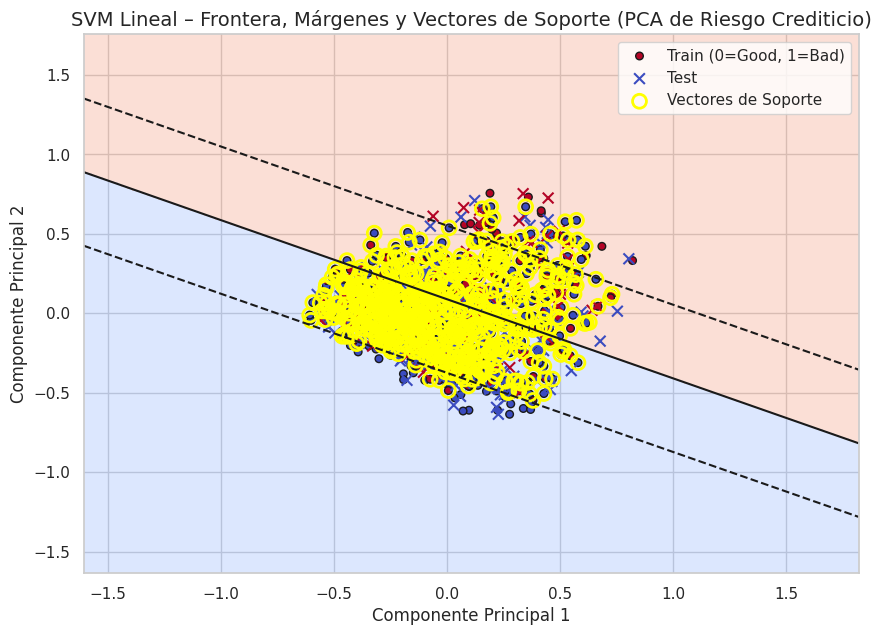

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# --- 1. Preparación de Datos (Preproceso + Normalizer + PCA) ---

# Paso 1.1: Usar nuestro 'preprocessor' para convertir X (mixto) a 100% numérico
print("Aplicando preprocesador (Scaler + OneHot)...")
# (Usando la corrección del error anterior, sin .toarray())
X_processed = preprocessor.fit_transform(X)

# Paso 1.2: Aplicar el Normalizer (de tu código base)
print("Aplicando Normalizer...")
X_norm = Normalizer().fit_transform(X_processed)

# Paso 1.3: Reducir a 2D con PCA (de tu código base)
print("Aplicando PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_norm)

# --- 2. Train/Test Split de datos 2D ---
# (Usamos y_numeric de 0/1 y el split de 70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_numeric,
    test_size=0.3,
    random_state=42,
    stratify=y_numeric
)

# --- 3. Entrenar SVM Lineal (de tu código base) ---
print("Entrenando SVM Lineal...")
# (Añadí class_weight="balanced" por nuestro desbalance 70/30)
svm_lin = SVC(kernel="linear", C=1.0, random_state=42, class_weight="balanced")
svm_lin.fit(X_train, y_train)

# --- 4. Gráfico (Tu código base) ---

# Crear malla
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                       np.linspace(y_min, y_max, 300))

# Obtener la 'distancia' de cada punto al hiperplano
Z = svm_lin.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico
plt.figure(figsize=(10, 7))

# Áreas de decisión (fondo)
plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap="coolwarm") # Z > 0 es la predicción

# Hiperplano (línea sólida) y Márgenes (líneas discontinuas)
plt.contour(xx, yy, Z,
            levels=[-1, 0, 1], # Niveles para -1 (margen), 0 (hiperplano), 1 (margen)
            linestyles=["--", "-", "--"],
            colors="k")

# Puntos de Train (círculos)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm",
            s=30, edgecolor="k", label="Train (0=Good, 1=Bad)")
# Puntos de Test (cruces 'x')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm",
            marker="x", s=60, label="Test")

# Vectores de soporte (círculos amarillos)
plt.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1],
            s=100, facecolors="none", edgecolors="yellow", linewidths=2,
            label="Vectores de Soporte")

plt.title("SVM Lineal – Frontera, Márgenes y Vectores de Soporte (PCA de Riesgo Crediticio)", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show();
